In [1]:
from __future__ import division, unicode_literals

import pandas as pd
import numpy as np

from IPython.core.display import HTML

import matplotlib.pyplot as plt
%matplotlib inline

## Pandas Pivot Tables

### Agenda:

<h4>
- &nbsp; Pivot Tables <br><br>
- &nbsp; Values <br><br>
- &nbsp; Columns <br><br>
- &nbsp; Index <br><br>
- &nbsp; Aggfunc <br><br>
- &nbsp; Margins <br><br>
<h4>


## Pivot Tables

## Q: Who has used a pivot table in Excel?

In [2]:
from IPython.core.display import Image
Image(url='http://cdn.get-digital-help.com/wp-content/uploads/2012/03/pivot-table-basics-final2.gif')

## Pandas offers this same functionality

## ...Only it is much more powerful!

```python
df = pd.read_csv('/Users/ac/Downloads/sales.csv')

df.head()
```

In [3]:
df = pd.read_csv('/Users/ac/Downloads/sales.csv').dropna()

In [4]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466.0,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1.0,30000.0,presented
1,714466.0,Trantow-Barrows,Craig Booker,Debra Henley,Software,1.0,10000.0,presented
2,714466.0,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2.0,5000.0,pending
3,737550.0,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1.0,35000.0,declined
4,146832.0,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2.0,65000.0,won


## Let's create the most basic pivot table

In [5]:
pd.pivot_table(df, index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",737550.0,35000.0,1.000000
Herman LLC,141962.0,65000.0,2.000000
Jerde-Hilpert,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",307599.0,7000.0,3.000000
Keeling LLC,688981.0,100000.0,5.000000
Kiehn-Spinka,146832.0,65000.0,2.000000
Koepp Ltd,729833.0,35000.0,2.000000
Kulas Inc,218895.0,25000.0,1.500000


In [29]:
df.head()

,company,name,postTestScore,preTestScore,regiment
0,1st,Miller,25,4,Nighthawks
1,1st,Jacobson,94,24,Nighthawks
2,2nd,Ali,57,31,Nighthawks
3,2nd,Milner,62,2,Nighthawks
4,1st,Cooze,70,3,Dragoons


#### <ul> We have a mean across names for each numeric value

## But, why?

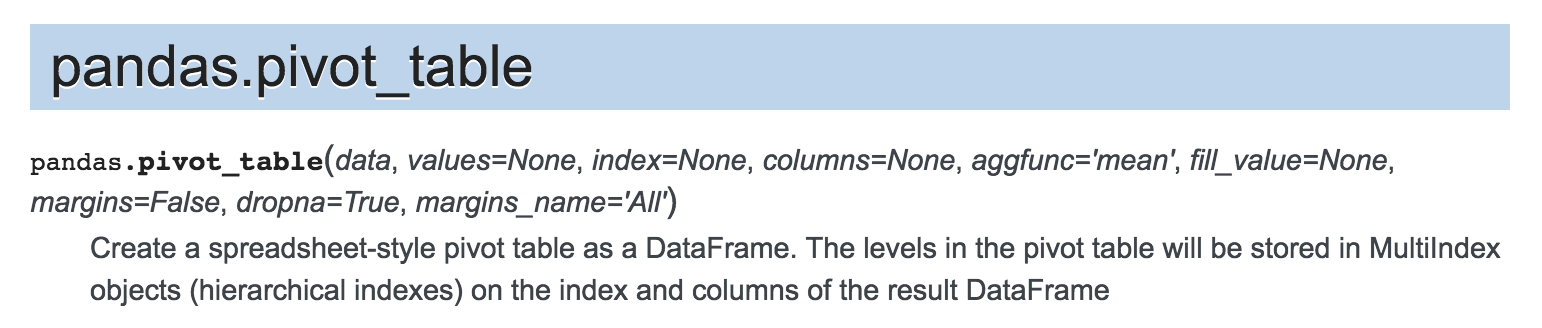

In [6]:
Image('/Users/ac/Documents/pandas_pivot.png')

## Let's specify just quantity

In [7]:
pd.pivot_table(df, index=["Name"], values=['Quantity'])

,Quantity
Name,
Barton LLC,1.000000
"Fritsch, Russel and Anderson",1.000000
Herman LLC,2.000000
Jerde-Hilpert,2.000000
"Kassulke, Ondricka and Metz",3.000000
Keeling LLC,5.000000
Kiehn-Spinka,2.000000
Koepp Ltd,2.000000
Kulas Inc,1.500000


#### <ul> We added values=['Quantity'], and instead of the default all numerics, we get just the specified columns

## Let's add another column - Price

In [8]:
pd.pivot_table(df, index=["Name"], values=['Quantity', 'Price'])

,Price,Quantity
Name,,
Barton LLC,35000.0,1.000000
"Fritsch, Russel and Anderson",35000.0,1.000000
Herman LLC,65000.0,2.000000
Jerde-Hilpert,5000.0,2.000000
"Kassulke, Ondricka and Metz",7000.0,3.000000
Keeling LLC,100000.0,5.000000
Kiehn-Spinka,65000.0,2.000000
Koepp Ltd,35000.0,2.000000
Kulas Inc,25000.0,1.500000


## E1.  Change index to Manager and Rep and set values to Price

## What if we don't want the mean, how do we override the default?

## Aggfunc let's you decide what function to aggregate your data with

## Let's use the sum instead

In [10]:
pd.pivot_table(df, index=['Manager', 'Rep'], values=['Price'],
               aggfunc=np.sum)

Price
Manager       Rep                    
Debra Henley  Craig Booker    80000.0
              Daniel Hilton  115000.0
              John Smith      40000.0
Fred Anderson Cedric Moss    110000.0
              Wendy Yule     177000.0

## But what if we want to see both the sum and the mean?

In [11]:
pd.pivot_table(df, index=['Manager', 'Rep'], values=['Price'],
               aggfunc=[np.sum, np.mean])

sum          mean
                                Price         Price
Manager       Rep                                  
Debra Henley  Craig Booker    80000.0  20000.000000
              Daniel Hilton  115000.0  38333.333333
              John Smith      40000.0  20000.000000
Fred Anderson Cedric Moss    110000.0  27500.000000
              Wendy Yule     177000.0  44250.000000

## Let's find out how many accounts there were for each product type

In [12]:
pd.pivot_table(df, index=['Product'], values=['Name'],
               aggfunc=len)

,Name
Product,
CPU,9
Maintenance,4
Monitor,1
Software,3


#### <ul> 'count' -- with the quotes also works, but not in a list

## What are we getting the len of though?

In [13]:
pd.set_option('display.max_colwidth', 250)

pd.pivot_table(df, index=['Product'], values=['Name'],
               aggfunc=np.sum)

,Name
Product,
CPU,"Trantow-BarrowsFritsch, Russel and AndersonKiehn-SpinkaKulas IncBarton LLCHerman LLCPurdy-KundeKeeling LLCKoepp Ltd"
Maintenance,"Trantow-BarrowsJerde-HilpertStokes LLCKassulke, Ondricka and Metz"
Monitor,Koepp Ltd
Software,Trantow-BarrowsKulas IncStokes LLC


### <ul> This is better accomplished with .groupby() which we'll learn later

## E2. What was the mean, median, and std. dev. price per product

## Let's now see what that looks like by manager

##  We're going to add a "column" to our frame to do this:

In [15]:
pd.pivot_table(df, index=['Product'], values=['Price'],
               columns=['Manager'], aggfunc=[np.mean, np.median, np.std])

mean                     median                \
                   Price                      Price                 
Manager     Debra Henley Fred Anderson Debra Henley Fred Anderson   
Product                                                             
CPU              41000.0       65000.0      35000.0       65000.0   
Maintenance       5000.0        6000.0       5000.0        6000.0   
Monitor              NaN        5000.0          NaN        5000.0   
Software         10000.0       10000.0      10000.0       10000.0   

                      std                
                    Price                
Manager      Debra Henley Fred Anderson  
Product                                  
CPU          13874.436926  28577.380332  
Maintenance      0.000000   1414.213562  
Monitor               NaN           NaN  
Software         0.000000           NaN

## We could do the same thing the other way

In [16]:
pd.pivot_table(df, index=['Manager'], values=['Price'],
               columns=['Product'], aggfunc=[np.mean, np.median, np.std])

mean                                median              \
                 Price                                 Price               
Product            CPU Maintenance Monitor Software      CPU Maintenance   
Manager                                                                    
Debra Henley   41000.0      5000.0     NaN  10000.0  35000.0      5000.0   
Fred Anderson  65000.0      6000.0  5000.0  10000.0  65000.0      6000.0   

                                         std                                
                                       Price                                
Product       Monitor Software           CPU  Maintenance Monitor Software  
Manager                                                                     
Debra Henley      NaN  10000.0  13874.436926     0.000000     NaN      0.0  
Fred Anderson  5000.0  10000.0  28577.380332  1414.213562     NaN      NaN

#### <ul> We just flipped the index from 'Product' to 'Manager' and columns from 'Manager' to 'Product'

## E3. Create a pivot table that presents for each manager, the number of accounts in each status

## E4. Do the same thing again but add the total for each account

## Adding totals

## We can use margins=True to accomplish that

In [19]:
pd.pivot_table(df, index=['Manager'], values=['Price'],
               columns=['Status'], aggfunc=[len, np.sum], margins=True)

len                                    sum           \
                 Price                                  Price            
Status        declined pending presented  won   All  declined  pending   
Manager                                                                  
Debra Henley       2.0     3.0       3.0  1.0   9.0   70000.0  50000.0   
Fred Anderson      1.0     1.0       3.0  3.0   8.0   65000.0   5000.0   
All                3.0     4.0       6.0  4.0  17.0  135000.0  55000.0   

                                             
                                             
Status        presented       won       All  
Manager                                      
Debra Henley    50000.0   65000.0  235000.0  
Fred Anderson   45000.0  172000.0  287000.0  
All             95000.0  237000.0  522000.0

## E5. Create a pivot table that gives for each manager, the product quantity -- both the count and the sum -- then using margins give the totals

## Independent Exercise

__Using the data in the worksheet:__
    1. Create a DataFrame
    
    2. Creat a pivot table that reports the mean, standard deviation, min, and
       max of the preTestScore for each company
       
    3. Create another that reports the same details for the postTestScore score
    
    4. Create a pivot table that has the information from both of the above tables
    
    5. Take it a step further and add the information for each regiment to the table
    
    6. Create a pivot table that reports the median and sum for pre and post test scores for each regiment get the
       results for the overall median and sum

In [21]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

## Using the data, report the mean, std. dev., max, and min of the pretest score for each compay

## Using the data, report the mean, std. dev., max, and min of the posttest score for each compay

## Now create a single table that has both pre and post 

## Now using the same data add the regiment

## Create a pivot table that reports the median and sum for pre and post test scores for each regiment get the results for the overall median and sum